# Trying to boost a category (concept)

In [19]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model = keras.models.load_model(os.path.join('models', 'painter_model'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 16)                5184      
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 645,361
Trainable params: 645,361
Non-trai

In [5]:
dirname = "painters_ds"

In [14]:
dfs = []
for filename in os.listdir(os.path.join('activations', dirname)):
    if filename.split('.')[-1] == 'pkl' and 'table_data' not in filename:
        dfs.append(pd.read_pickle(os.path.join('activations', dirname, filename)))

In [23]:
layer_to_explore = 0
df = dfs[layer_to_explore]
print(f"Using layer {model.layers[layer_to_explore].name}")

Using layer embedding


In [25]:
df.head(1)

,category,input,true,pred,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
http://dbpedia.org/resource/Alexander_Semionov,[http://dbpedia.org/resource/Russia],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,0.547359,-0.328434,-0.172445,0.069439,-0.628683,1.294147,...,0.466627,0.293625,-0.208663,-0.316626,-0.006433,-0.412829,0.242208,0.072852,0.725296,-0.755482


In [27]:
df.iloc[0, 4:]

neuron_1     0.547359
neuron_2    -0.328434
neuron_3    -0.172445
neuron_4     0.069439
neuron_5    -0.628683
               ...   
neuron_60   -0.412829
neuron_61    0.242208
neuron_62    0.072852
neuron_63    0.725296
neuron_64   -0.755482
Name: http://dbpedia.org/resource/Alexander_Semionov, Length: 64, dtype: object

In [103]:
def plot_activ(df, df2=None):
    plt.figure(figsize=(15, 6))
    sns.lineplot(x=range(len(df.iloc[0, :])), y=df.iloc[0, :])
    if df2 is not None:
        sns.lineplot(x=range(len(df2.iloc[0, :])), y=df2.iloc[0, :])
    plt.show()
    
    plt.figure(figsize=(15, 6))
    sns.scatterplot(x=range(len(df.iloc[0, :])), y=df.iloc[0, :])
    if df2 is not None:
        sns.scatterplot(x=range(len(df2.iloc[0, :])), y=df2.iloc[0, :])
    plt.show()
    
def get_cat_df(df, cat):
    return df[df.category.apply(lambda x: cat in x)]

def get_mean_activations(df):
    df_act = df.iloc[:, 4:]
    return df_act.mean()

In [104]:
cat = 'http://dbpedia.org/resource/Russia'

In [105]:
df_cat = get_cat_df(df, cat)
df_mean_cat = get_mean_activations(df_cat)
df_mean_cat = pd.DataFrame(df_mean_cat).T
df_mean_cat

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
0,0.165338,-0.519022,-0.310005,0.391009,-0.775784,0.537406,-0.08439,-0.20704,0.027329,-0.238381,...,-0.040775,-0.125858,0.220746,0.132845,-0.308484,0.102303,-0.253206,0.417666,0.167214,-0.270119


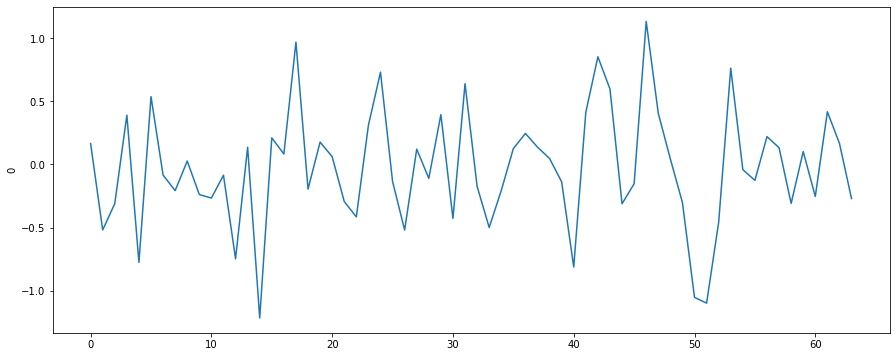

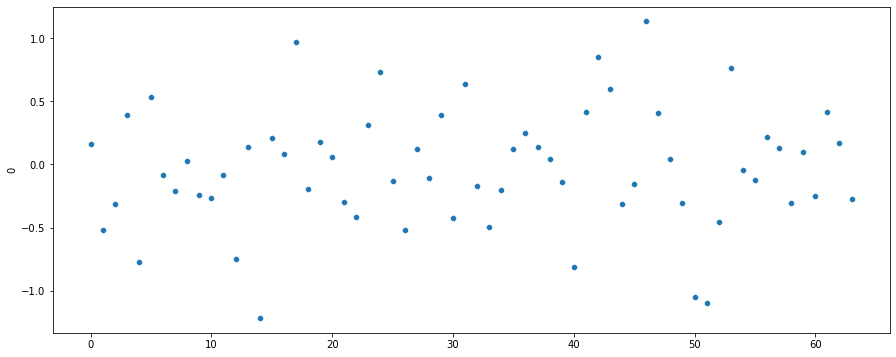

In [106]:
plot_activ(df_mean_cat)

In [131]:
def get_sample(df, cat=None):
    if cat is None:
        return df.sample(n=1)
    else:
        return get_cat_df(df, cat).sample(n=1)

In [137]:
cat

'http://dbpedia.org/resource/Russia'

In [153]:
sample = get_sample(df, 'http://dbpedia.org/resource/Russia')
sample

,category,input,true,pred,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
http://dbpedia.org/resource/Vladimir_Lisunov,[http://dbpedia.org/resource/Russia],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0.402642,0.122289,0.339266,-0.407499,0.121465,0.499158,...,0.363186,0.361835,-0.427839,-0.359955,0.289879,-0.439667,0.422789,-0.381791,0.451135,-0.255929


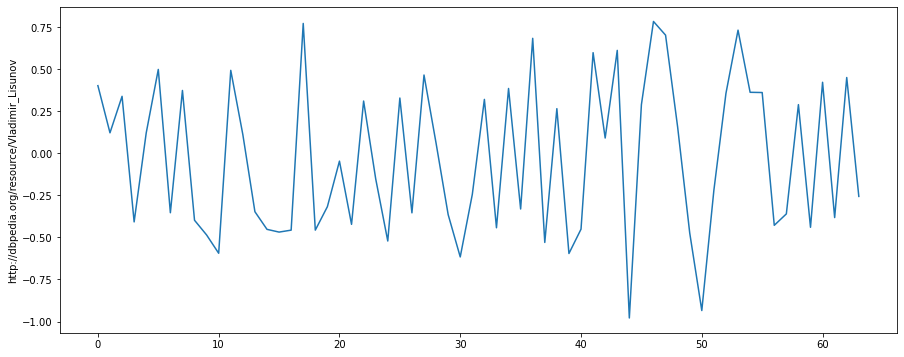

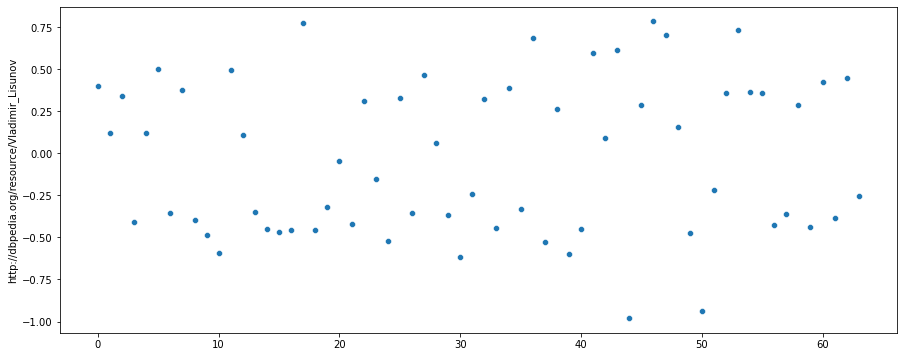

In [154]:
df_act_sample = pd.DataFrame(sample.iloc[0, 4:]).T
plot_activ(df_act_sample)

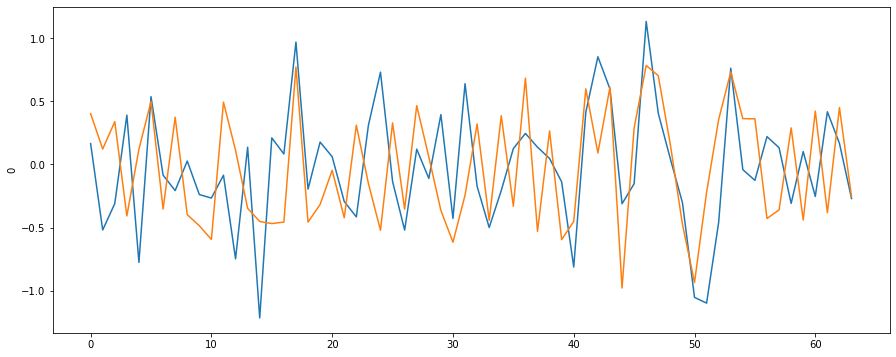

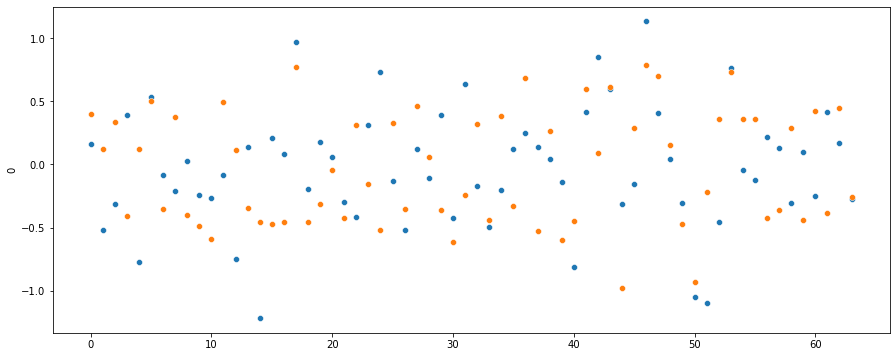

In [155]:
plot_activ(df_mean_cat, df_act_sample)

In [156]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=[x for x in range(len(df_mean_cat.iloc[0, :]))], 
                         y=df_mean_cat.iloc[0, 4:], 
                         mode='lines', name='mean activs'))

fig.add_trace(go.Scatter(x=[x for x in range(len(df_act_sample.iloc[0, :]))], 
                         y=df_act_sample.iloc[0, 4:], 
                         mode='lines', name='sample'))

fig.show()

In [157]:
def get_diffs(df, sample_df):
    return sample_df.reset_index().drop(columns=['index']) - df

In [158]:
diffs = get_diffs(df_mean_cat, df_act_sample)
diffs

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
0,0.237304,0.641312,0.649271,-0.798507,0.897249,-0.038249,-0.268707,0.581192,-0.425064,-0.246866,...,0.403962,0.487694,-0.648584,-0.4928,0.598363,-0.54197,0.675996,-0.799457,0.283921,0.01419


In [159]:
avg_diff = abs(diffs).sum().sum()/len(diffs.iloc[0, :])
print(f"Average difference is: {avg_diff}")

Average difference is: 0.45555195419001393
